# Python - Individual Assignment

## Task 1

In [ ]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/gamers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# Display summary statistics for numerical columns
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Task 2

In [ ]:
unique_genres = df['Genre'].unique()

# Display the number of unique genres
num_unique_genres = len(unique_genres)
print(f'Number of unique video game genres: {num_unique_genres}')

# Optionally, display the unique genres
print(f'Unique video game genres: {unique_genres}')

Number of unique video game genres: 12
Unique video game genres: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [ ]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 16598 rows and 11 columns.


In [ ]:
# Display the number of instances (rows) in the dataset
num_instances = df.shape[0]
print(f'Number of instances in the dataset: {num_instances}')

Number of instances in the dataset: 16598


In [ ]:
# Check for missing values
print(df.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [ ]:
# Recalculate the global sales by summing the regional sales columns
calculated_global_sales = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

# Round the recalculated and original global sales values to 2 decimal places
calculated_global_sales_rounded = calculated_global_sales.round(2)
global_sales_rounded = df['Global_Sales'].round(2)

# Check if the rounded recalculated global sales matches the rounded 'Global_Sales' column
sales_discrepancy = df[calculated_global_sales_rounded != global_sales_rounded]

# Display the number of rows with discrepancies
num_discrepancies = sales_discrepancy.shape[0]
print(f'Number of rows with incorrect global sales: {num_discrepancies}')

Number of rows with incorrect global sales: 4511


In [ ]:
# Recalculate the global sales by summing the regional sales columns
df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

# Check if the recalculated global sales matches the 'Global_Sales' column
sales_discrepancy = df[calculated_global_sales != df['Global_Sales']]

# Display the number of rows with discrepancies
num_discrepancies = sales_discrepancy.shape[0]
print(f'Number of rows with incorrect global sales: {num_discrepancies}')

Number of rows with incorrect global sales: 0


In [ ]:
# Group by 'Publisher' and sum the 'Global_sales'
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().reset_index()

# Sort the values in descending order based on total sales
top_publishers = top_publishers.sort_values(by='Global_Sales', ascending=False)

# Display the top 3 publishers
top_3_publishers = top_publishers.head(3)
print(top_3_publishers)

           Publisher  Global_Sales
359         Nintendo       1786.36
138  Electronic Arts       1110.15
21        Activision        727.11


In [ ]:
# Group by 'genre' and count the number of games in each genre
top_genres = df['Genre'].value_counts().reset_index()

# Rename the columns for clarity
top_genres.columns = ['Genre', 'count']

# Display the top 3 genres with the most video games
top_3_genres = top_genres.head(3)
print(top_3_genres)

    Genre  count
0  Action   3316
1  Sports   2346
2    Misc   1739


## Task 3

<ipython-input-14-07c6bda0a16a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='plasma')


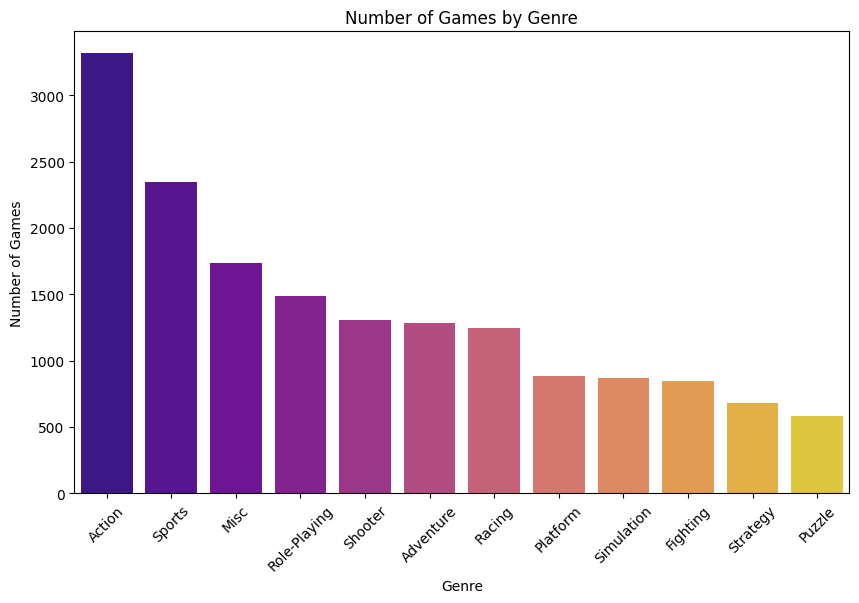

In [ ]:
# Count the number of games in each genre
genre_counts = df['Genre'].value_counts()

# Create a bar plot for the genres with the most games
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='plasma')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Number of Games by Genre')
plt.show()

<ipython-input-15-6e079fd1d1a5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_years_sales.index, y=top_5_years_sales.values, palette='plasma',


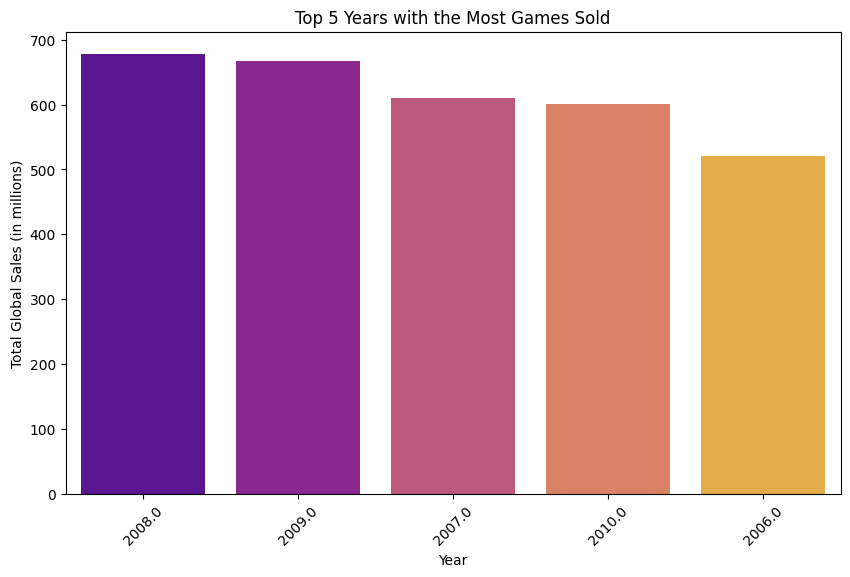

In [ ]:
# Group by 'Year' and sum the global sales for each year
top_years_sales = df.groupby('Year')['Global_Sales'].sum().sort_values(ascending=False)

# Select the top 5 years with the most sales
top_5_years_sales = top_years_sales.head(5)

# Create a bar plot for the top 5 years with the most games sold, ensuring descending order by sales
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_years_sales.index, y=top_5_years_sales.values, palette='plasma',
            order=top_5_years_sales.index)  # Specify the order based on sales

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.title('Top 5 Years with the Most Games Sold')
plt.xticks(rotation=45)

# Show the plot
plt.show()

<ipython-input-16-5b990e82d9a3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_genres_japan_sales.index, y=top_5_genres_japan_sales.values, palette='plasma')


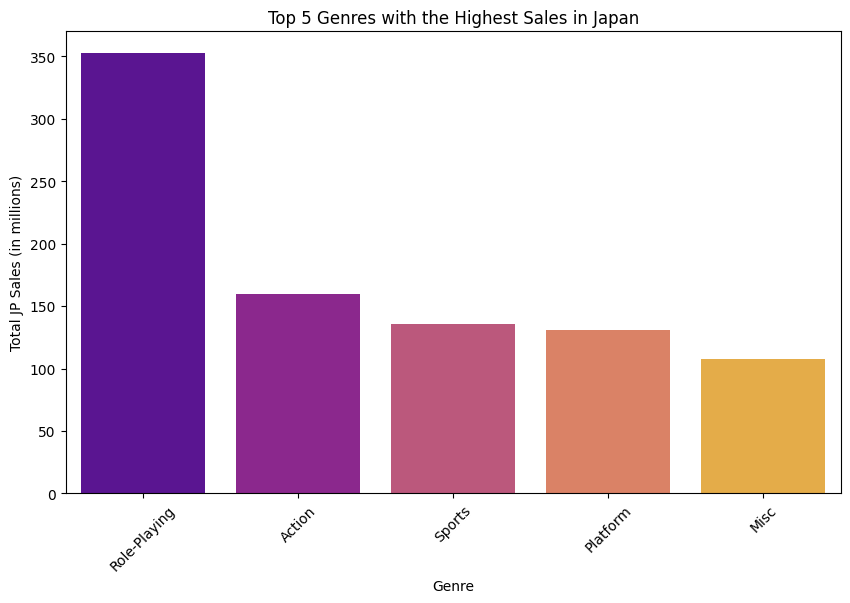

In [ ]:
# Group by 'Genre' and sum the JP sales for each genre
top_genres_japan_sales = df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False)

# Select the top 5 genres with the most sales in Japan
top_5_genres_japan_sales = top_genres_japan_sales.head(5)

# Create a bar plot for the top 5 genres that earned the highest in Japan
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_genres_japan_sales.index, y=top_5_genres_japan_sales.values, palette='plasma')

# Set labels and title
plt.xlabel('Genre')
plt.ylabel('Total JP Sales (in millions)')
plt.title('Top 5 Genres with the Highest Sales in Japan')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

<ipython-input-17-591c75b2db9e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_genres.index, y=top_5_genres.values, palette='plasma')


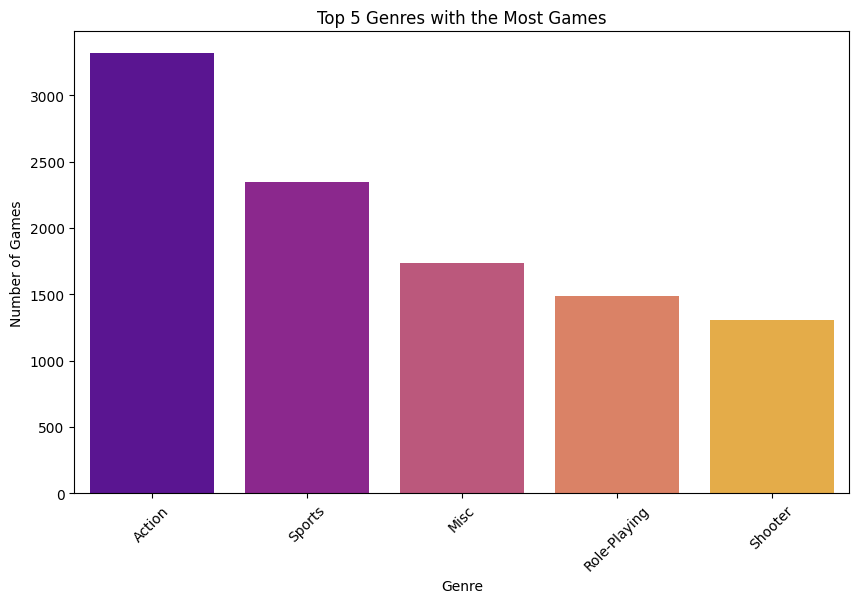

In [ ]:
# Top 5 genres
top_5_genres = genre_counts.head(5)

# Create a bar plot for the top 5 genres
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=top_5_genres.index, y=top_5_genres.values, palette='plasma')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Top 5 Genres with the Most Games')
plt.show()

<ipython-input-18-1d619ef36c4d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5_genres.index, y=bottom_5_genres.values, palette='plasma')


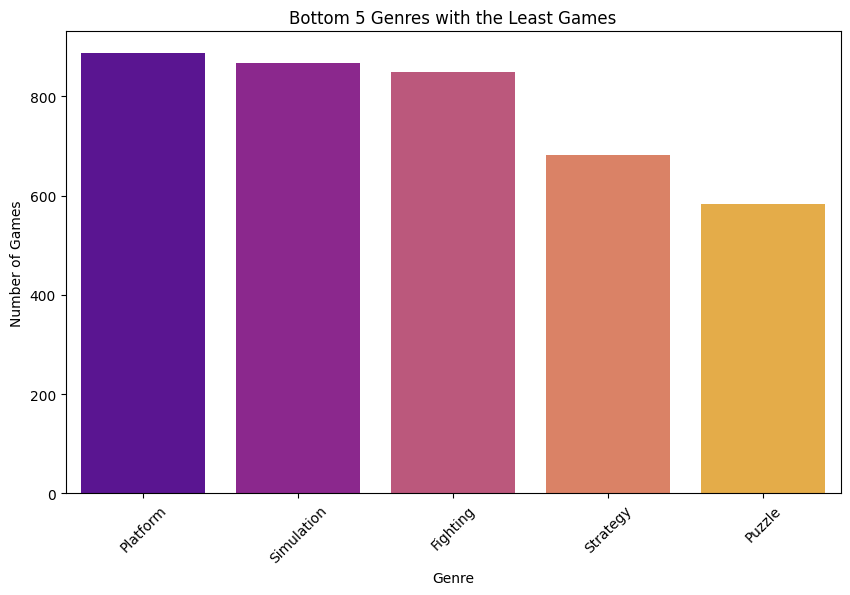

In [ ]:
# Bottom 5 genres
bottom_5_genres = genre_counts.tail(5)

# Create a bar plot for the bottom 5 genres
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=bottom_5_genres.index, y=bottom_5_genres.values, palette='plasma')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Bottom 5 Genres with the Least Games')
plt.show()

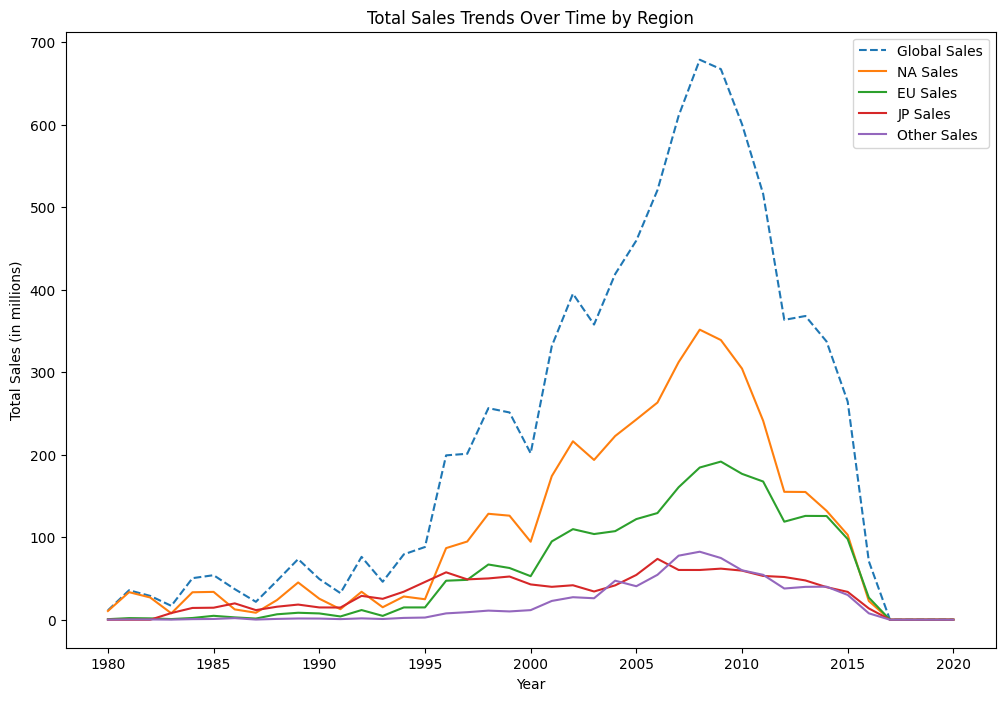

In [ ]:
# Group by 'Year' and sum the sales columns
yearly_sales = df.groupby('Year').sum()

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot each sales category over the years
plt.plot(yearly_sales.index, yearly_sales['Global_Sales'], label='Global Sales', linestyle='--')
plt.plot(yearly_sales.index, yearly_sales['NA_Sales'], label='NA Sales')
plt.plot(yearly_sales.index, yearly_sales['EU_Sales'], label='EU Sales')
plt.plot(yearly_sales.index, yearly_sales['JP_Sales'], label='JP Sales')
plt.plot(yearly_sales.index, yearly_sales['Other_Sales'], label='Other Sales')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales Trends Over Time by Region')

# Display the legend to differentiate the sales lines
plt.legend()

# Show the plot
plt.show()

## Task 4

<ipython-input-20-7f227d73fde1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_genres_japan_sales.index, y=top_5_genres_japan_sales.values, palette='Reds_r')


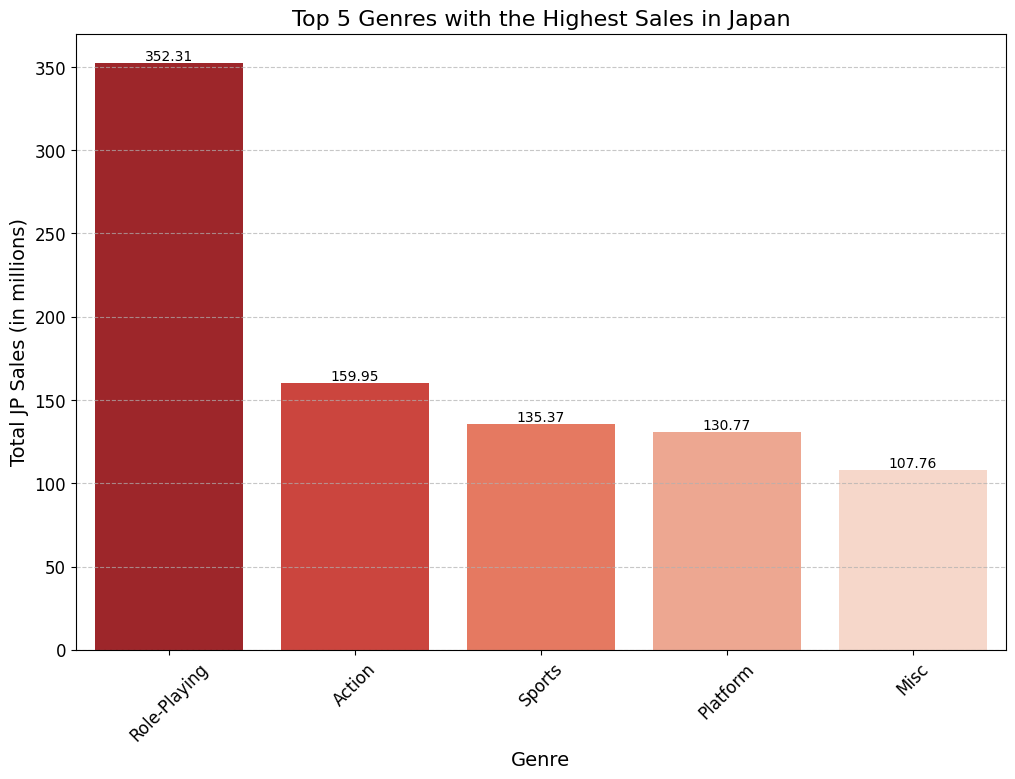

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_5_genres_japan_sales.index, y=top_5_genres_japan_sales.values, palette='Reds_r')

# Add data labels on top of the bars
for i in range(len(top_5_genres_japan_sales)):
    plt.text(i, top_5_genres_japan_sales.values[i], round(top_5_genres_japan_sales.values[i], 2), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total JP Sales (in millions)', fontsize=14)
plt.title('Top 5 Genres with the Highest Sales in Japan', fontsize=16)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate the x-axis labels if necessary
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


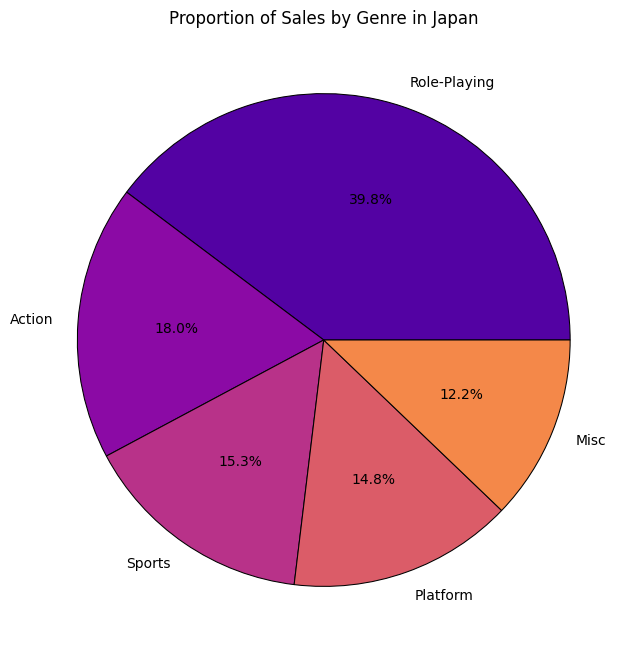

In [ ]:
# Set up the figure
plt.figure(figsize=(8, 8))

# Use a contrasting color palette (e.g., 'Set2' or 'Paired') and add edgecolor for better boundary visibility
colors = sns.color_palette('plasma')

# Create the pie chart with edgecolor and label formatting for clarity
plt.pie(top_5_genres_japan_sales,
        labels=top_5_genres_japan_sales.index,
        autopct='%1.1f%%',
        colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.75})

# Set the title
plt.title('Proportion of Sales by Genre in Japan')

# Add gridlines along the x-axis for better value comparison
plt.grid(axis='x', linestyle='--', color='gray', alpha=0.7)

# Display the pie chart
plt.show()

## Task 5

<ipython-input-22-93bc8ff26406>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=top_10_games_na['Name'], y=top_10_games_na['NA_Sales'], palette='plasma')


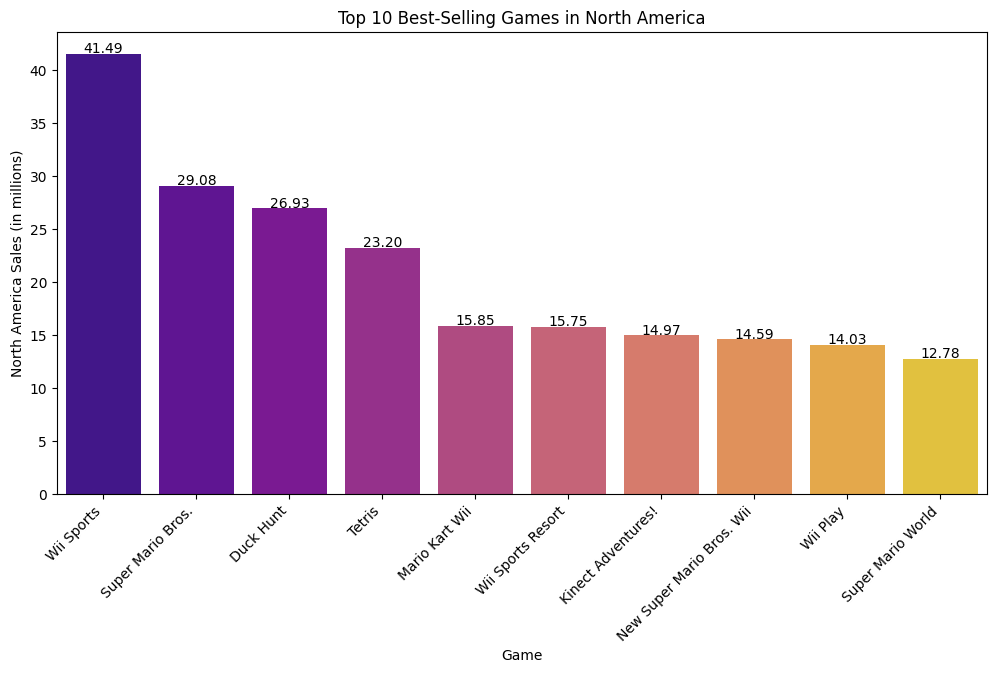

In [ ]:
# Sort the dataset by North America sales in descending order and select the top 10 games
top_10_games_na = df[['Name', 'NA_Sales']].sort_values(by='NA_Sales', ascending=False).head(10)

# Create a bar plot for the top 10 games sold in North America
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
bar_plot = sns.barplot(x=top_10_games_na['Name'], y=top_10_games_na['NA_Sales'], palette='plasma')

# Add labels to each bar
for index, value in enumerate(top_10_games_na['NA_Sales']):
    plt.text(index, value + 0.1, f'{value:.2f}', ha='center')  # Adjust position for readability

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Game')
plt.ylabel('North America Sales (in millions)')
plt.title('Top 10 Best-Selling Games in North America')
plt.show()

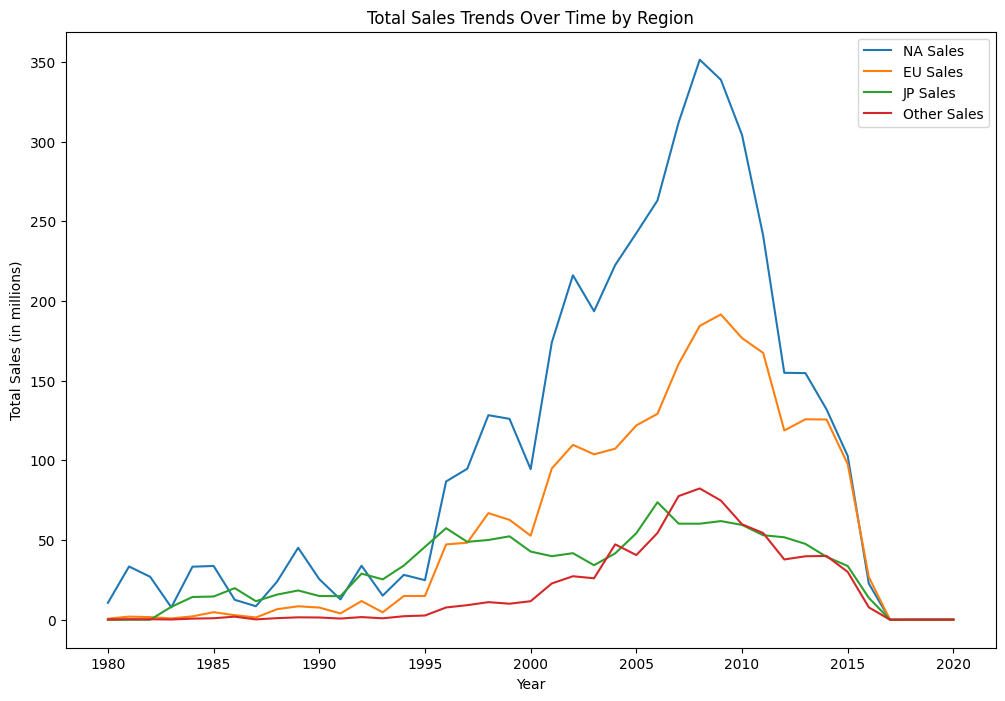

In [ ]:
# Group by 'Year' and sum the sales columns
yearly_sales = df.groupby('Year').sum()

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot each sales category over the years
plt.plot(yearly_sales.index, yearly_sales['NA_Sales'], label='NA Sales')
plt.plot(yearly_sales.index, yearly_sales['EU_Sales'], label='EU Sales')
plt.plot(yearly_sales.index, yearly_sales['JP_Sales'], label='JP Sales')
plt.plot(yearly_sales.index, yearly_sales['Other_Sales'], label='Other Sales')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales Trends Over Time by Region')

# Display the legend to differentiate the sales lines
plt.legend()

# Show the plot
plt.show()

<ipython-input-24-f1e505593efa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_std.index, y=sales_std.values, palette='coolwarm')


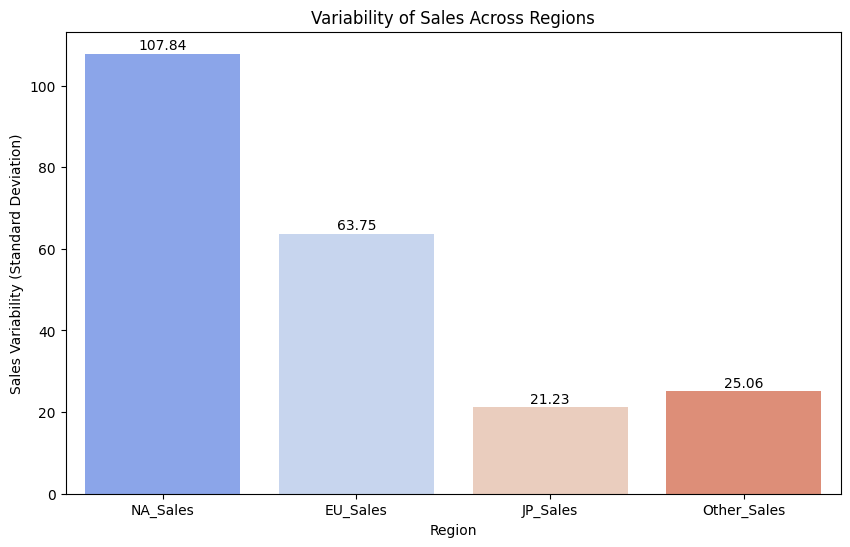

In [ ]:
# Group by 'Year' and aggregate sales for each region
sales_by_year = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Calculate the standard deviation of sales for each region to measure consistency
sales_std = sales_by_year.std()

# Create a bar chart to show the variability in sales (standard deviation) across regions
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_std.index, y=sales_std.values, palette='coolwarm')

# Add labels on the bars
for i, value in enumerate(sales_std.values):
    plt.text(i, value + 1, round(value, 2), ha='center')  # Adds the value above each bar

plt.xlabel('Region')
plt.ylabel('Sales Variability (Standard Deviation)')
plt.title('Variability of Sales Across Regions')
plt.show()

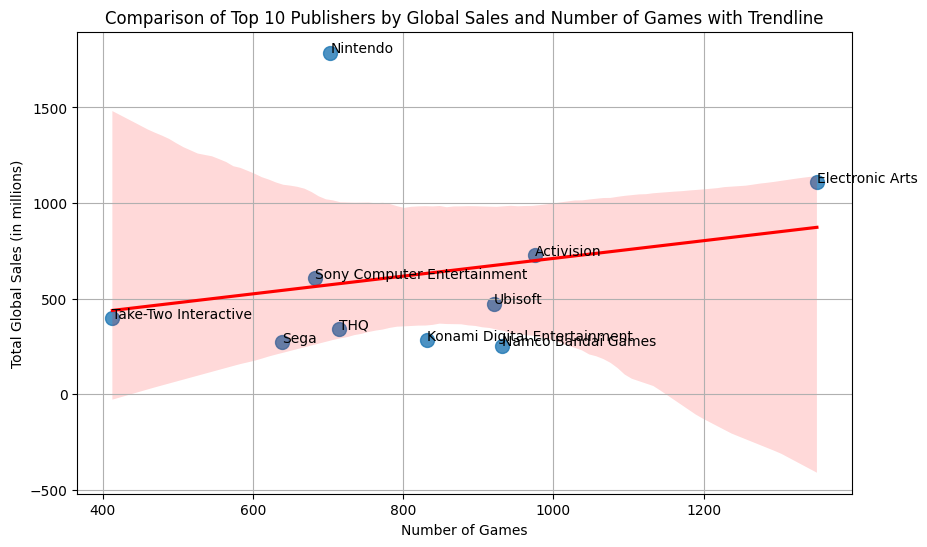

In [ ]:
# Group the data by publisher to calculate total global sales and count of games
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
publisher_game_count = df.groupby('Publisher')['Name'].count().sort_values(ascending=False).head(10)

# Combine both top 10 publishers (some may overlap)
combined_publishers = pd.concat([publisher_sales, publisher_game_count], axis=1, keys=['Total_Sales', 'Game_Count']).dropna()

# Plot a scatter plot to compare top publishers by global sales and game count
plt.figure(figsize=(10, 6))
sns.regplot(x=combined_publishers['Game_Count'], y=combined_publishers['Total_Sales'], scatter_kws={'s':100}, line_kws={'color':'red'})

# Add labels to each point
for publisher in combined_publishers.index:
    plt.text(combined_publishers.loc[publisher, 'Game_Count'] + 0.1, combined_publishers.loc[publisher, 'Total_Sales'], publisher)

plt.xlabel('Number of Games')
plt.ylabel('Total Global Sales (in millions)')
plt.title('Comparison of Top 10 Publishers by Global Sales and Number of Games with Trendline')
plt.grid(True)
plt.show()